# Example 5
Implemente un Algoritmo Evolutivo que, dadas las siguientes funciones, busque cumplir con el objetivo propuesto para cada una de ellas.

a) Para f 1(x , y)=0.5 x2+y2−x y−2 x−6 y , con −5⩽x⩽5, −10⩽y⩽10 , buscar donde se encuentra el mínimo de esta función.

b) Para f 2(x)=∑|xi|(i+1) , con x=(x1, x2,..., xn) y n=4 , buscar x tal que f 2(x)=0 , i=1

sabiendo que −1⩽x1⩽1 , −0,8⩽x2⩽1,2 , −0,5⩽x3⩽0,75 y −1,4⩽x4⩽0,5 .

En cada uno de los puntos, detalle:

i. El tipo y forma del cromosoma.

ii. Los operadores genéticos usados.

iii. Los parámetros empleados para la ejecución del algoritmo.

Para asegurarse de haber obtenido resultados consistentes, realice 10 ejecuciones independientes e informe los mejores resultados encontrados en cada ejecución junto con su  tness y la cantidad de generaciones que se necesitaron para obtenerlos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import mpld3

%matplotlib inline
mpld3.enable_notebook()

from utils.busqueda_local import hill_climb
from deap import base, creator, tools, algorithms

In [22]:
# -*- coding: utf-8 -*-
"""
Example 5: Optimización numérica
"""

def F_1(x, y):
    return 0.5 * x ** 2 + y ** 2 - x * y - 2 * x - 6 * y


def F_2(x):
##    return sum(abs(x) ** (2, 3, 4, 5))
    tot=0
    for i in range(len(x)):
        aux = abs(x[i])
        tot+= aux ** (i+1)
    return tot


# Parte a)

## Fitness

In [4]:
creator.create("Fitness", base.Fitness, weights=(-9999,))
creator.create("Individual", list, fitness=creator.Fitness)

## Individuo

In [5]:
def nuevoPar():
    x=round(-5 + np.random.random() * (5 - -5), 2)
    y=round(-10 + np.random.random() * (10 - -10), 2)
    return [x,y]

In [6]:
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, nuevoPar)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

## Evaluacion, cruza, mutacion y seleccion

In [7]:
def evaluarADN(x):
    return [F_1(*x)]

In [8]:
toolbox.register("evaluate", evaluarADN)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.50)
toolbox.register("select", tools.selTournament, tournsize=5)

## Find Best Solution

In [9]:
def main():    
    GENERACIONES=50
    pop = toolbox.population(n=1000)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=GENERACIONES, stats=stats, halloffame=hof, verbose=True)
    return pop, logbook, hof

gen	nevals	avg    	min     	max    
0  	1000  	41.9771	-27.5396	203.499
1  	591   	-5.30526	-28.7958	112.766
2  	597   	-21.1429	-31.446 	13.1049
3  	574   	-26.1354	-31.9947	-15.6409
4  	617   	-28.1043	-32.5467	-15.8139
5  	620   	-29.7558	-32.686 	-19.6095
6  	595   	-31.0454	-32.726 	-23.6439
7  	619   	-31.6234	-32.9914	-23.7339
8  	623   	-32.0991	-33.1977	-24.6119
9  	604   	-32.2855	-33.1977	-25.6935
10 	610   	-32.3808	-33.1977	-25.6935
11 	570   	-32.4167	-33.1977	-25.6935
12 	641   	-32.5524	-33.1977	-26.3255
13 	590   	-32.4418	-33.1977	-26.3255
14 	585   	-32.5311	-33.1977	-26.3255
15 	546   	-32.6067	-33.1977	-26.3255
16 	583   	-32.6205	-33.1977	-26.3255
17 	602   	-32.4143	-33.1977	-26.3255
18 	579   	-32.483 	-33.1977	-26.3255
19 	596   	-32.5105	-33.1977	-26.3255
20 	616   	-32.4899	-33.1977	-26.3255
21 	654   	-32.4693	-33.1977	-26.3255
22 	616   	-32.538 	-33.1977	-26.3255
23 	603   	-32.538 	-33.1977	-26.3255
24 	611   	-32.5174	-33.1977	-26.3255
25 	612   	-32.373

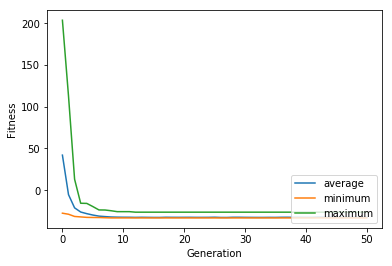

In [10]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")

# Parte B)

## Fitness

In [168]:
creator.create("Fitness", base.Fitness, weights=(-0.01,))
creator.create("Individual", list, fitness=creator.Fitness)

## Individuo

In [169]:
def nuevoGEN():
    v=[]
    v.append(round(-1 + np.random.random() * (1 - -1), 3))
    v.append(round(-0.8 + np.random.random() * (1.2 - -0.8), 3))
    v.append(round(-0.5 + np.random.random() * (0.75 - -0.5), 3))
    v.append(round(-1.4 + np.random.random() * (0.5 - -1.4), 3))
    return v

In [170]:
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, nuevoGEN)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

## Evaluacion, cruza, mutacion y seleccion

In [16]:
def evaluarADN2(x):
    return [F_2(x)]

In [24]:
toolbox.register("evaluate", evaluarADN2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, indpb=0.50, mu=0.01, sigma=0.3)
toolbox.register("select", tools.selRoulette)

In [25]:
def main():    
    GENERACIONES=30
    pop = toolbox.population(n=1000)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=GENERACIONES, stats=stats, halloffame=hof, verbose=True)
    return pop, logbook, hof

gen	nevals	avg    	min   	max    
0  	1000  	35.1161	0.0624	102.604
1  	580   	58.9894	0.8749	108.367
2  	594   	71.6068	1.8381	108.492
3  	630   	79.6859	5.4   	110.254
4  	634   	84.7472	12.3391	114.671
5  	618   	88.1789	29.6963	114.174
6  	630   	90.444 	32.3924	120.498
7  	567   	92.0987	31.3588	122.336
8  	592   	93.8418	43.4237	129.408
9  	606   	95.3415	55.8742	130.211
10 	602   	96.4983	62.6208	130.211
11 	575   	97.5158	59.1883	130.211
12 	590   	98.6309	61.9926	137.277
13 	586   	99.3843	61.9926	142.651
14 	628   	100.648	63.7835	142.651
15 	588   	101.631	70.2968	142.651
16 	629   	102.945	73.2031	145.268
17 	602   	104.519	71.4974	146.955
18 	647   	105.322	72.984 	143.178
19 	596   	106.479	73.1294	143.809
20 	576   	107.749	73.1504	146.968
21 	578   	109.362	71.5624	151.278
22 	573   	110.736	71.5624	151.278
23 	594   	112.474	71.8564	159.183
24 	592   	114.793	71.3197	165.486
25 	585   	116.278	70.459 	165.486
26 	593   	117.476	65.4956	165.486
27 	646   	118.584	65.495

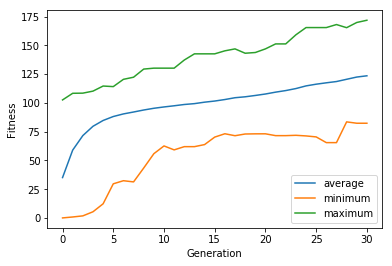

In [26]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")